<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Jamboree%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

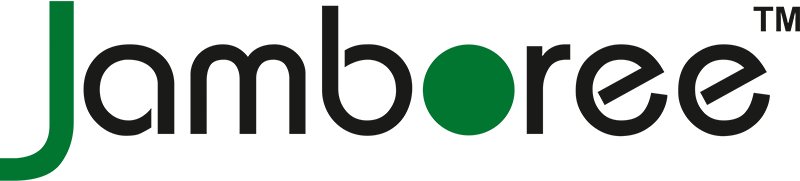
* Jamboree Education offers comprehensive classroom and online preparation programs for GMAT®, GRE®, SAT®, ACT®, TOEFL™, and IELTS™, as well as admissions counselling.
* Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.

# **Business Problem**

* Jamboree recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspectiv
* They want to understand what factors are important in graduate admissions and how these factors are interrelated among themselves.
* It will also help predict one's chances of admission given the rest of the variables

# **Desired Outcome of Analysis**
* Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset.
* Drop the unique row Identifier if you see any. This step is important as you don’t want your model to build some understanding based on row numbers.
* Use Non-graphical and graphical analysis for getting inferences about variables.
* This can be done by checking the distribution of variables of graduate applicants.
* Once you’ve ensured that students with varied merit apply for the university, you can start understanding the relationship between different factors responsible for graduate admissions.
* Check correlation among independent variables and how they interact with each other.
* Use Linear Regression from (Statsmodel library) and explain the results.
* Test the assumptions of linear regression:
** Multicollinearity check by VIF score
** Mean of residuals
** Linearity of variables (no pattern in residual plot)
** Test for Homoscedasticity
** Normality of residuals
* Do model evaluation- MAE, RMSE, R2 score, Adjusted R2.
* Provide actionable Insights & Recommendations
* Try out different Linear Regression

# **Loading Modules and Data**

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

#from scipy.stats import  ttest_ind

from scipy.stats import shapiro,levene
#from statsmodels.graphics.gofplots import qqplot

#from scipy.stats import mannwhitneyu

#!pip install category_encoders
#from category_encoders import TargetEncoder
#!pip install sklearn
# from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler, MinMaxScaler

In [145]:
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv")

**Description of each column in data**
* Serial No. (Unique row ID)
* GRE Scores (out of 340)
* TOEFL Scores (out of 120)
* University Rating (out of 5)
* Statement of Purpose and Letter of Recommendation Strength (out of 5)
* Undergraduate GPA (out of 10)
* Research Experience (either 0 or 1)
* Chance of Admit (ranging from 0 to 1)

# **Data Overview & Cleaning**

In [ ]:
data.shape

(500, 9)

In [ ]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

* Lets Remove the Additional space from Feature name for easy reference later on

In [146]:
data.rename(columns = {'LOR ' : 'LOR' ,'Chance of Admit ':'Chance of Admit'}, inplace = True)

In [ ]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [ ]:
data.index

RangeIndex(start=0, stop=500, step=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Dropping Irrelevant columns

Lets Drop the "Serial No" Fields as it just an row indicator does not help us in Predicting "Chance of Admit"


In [147]:
data.drop(["Serial No."], axis = 1,inplace= True)

In [ ]:
data.shape

(500, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


## Duplicate Values & Their Treatment

In [ ]:
data.loc[data.duplicated()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


No duplicate rows found

## Missingvalues & Their Treatment

In [ ]:
data.isna().sum(axis = 0)

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

* No Missing values present in the data

## Datatype Conversion of Features

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


* All data Points are Numericals as needed for Linear Regression Model
* No need for conversion of data to Categorical type, all Numerical Data points has some ordinal Meaning

# **Statistical Analysis,Graphical Visualization & Insights**

In [ ]:
data.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [ ]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Univariate Analysis

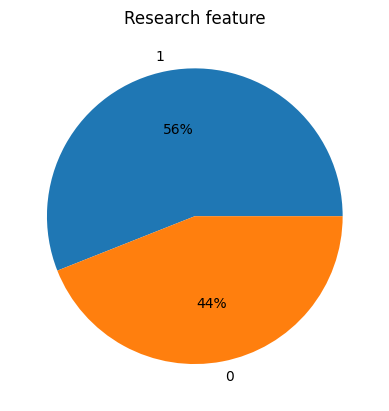

In [ ]:
plt.pie(x = data["Research"].value_counts().reset_index()["Research"],
        labels = data["Research"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("Research feature")
plt.show()

* 56% Students have Research Expericence
* 44% Students do have Research Experience

<Axes: xlabel='GRE Score', ylabel='count'>

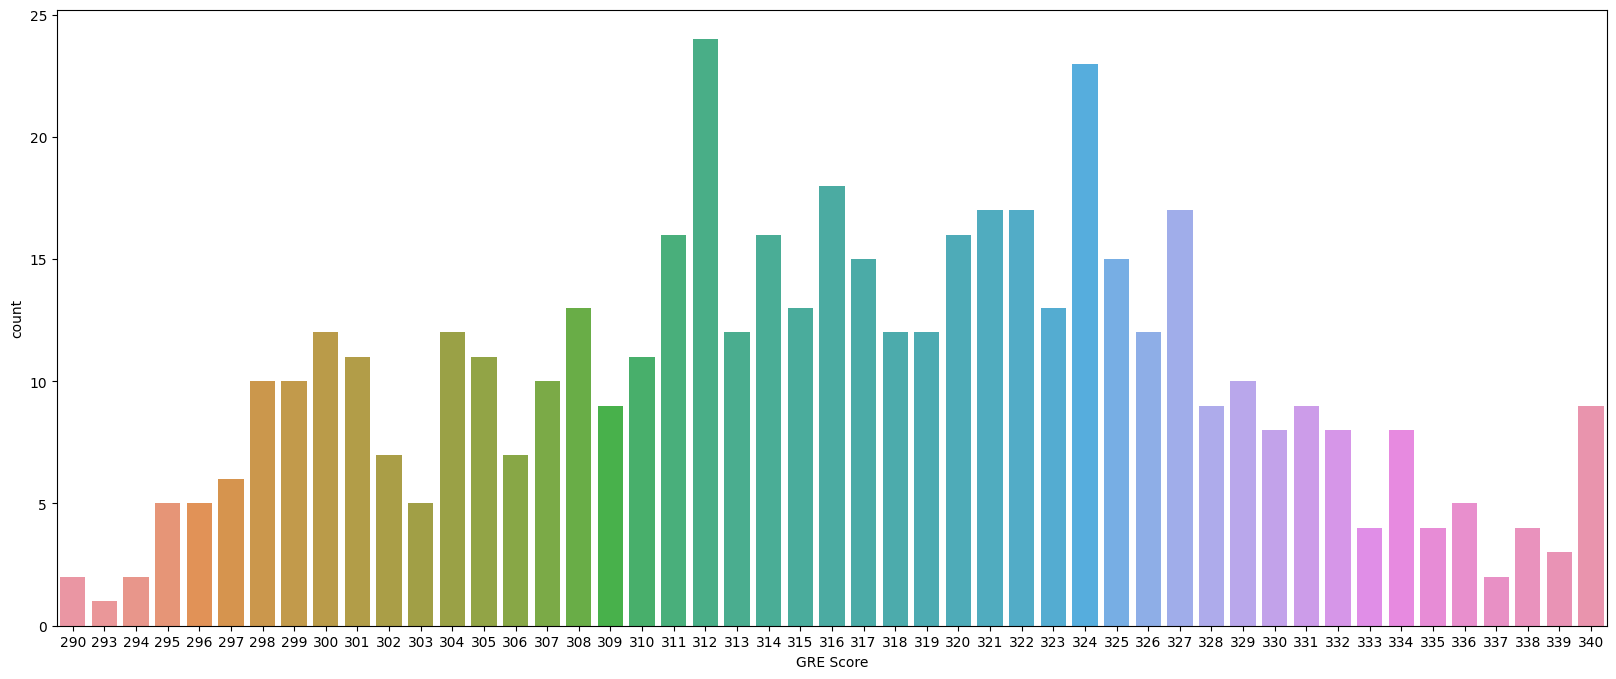

In [10]:
plt.figure(figsize = (20,8))
sns.countplot(data=data, x= "GRE Score")

* GRE Scores are greater than 290, More No of Data points are in that range 310 ~ 327

<Axes: xlabel='TOEFL Score', ylabel='count'>

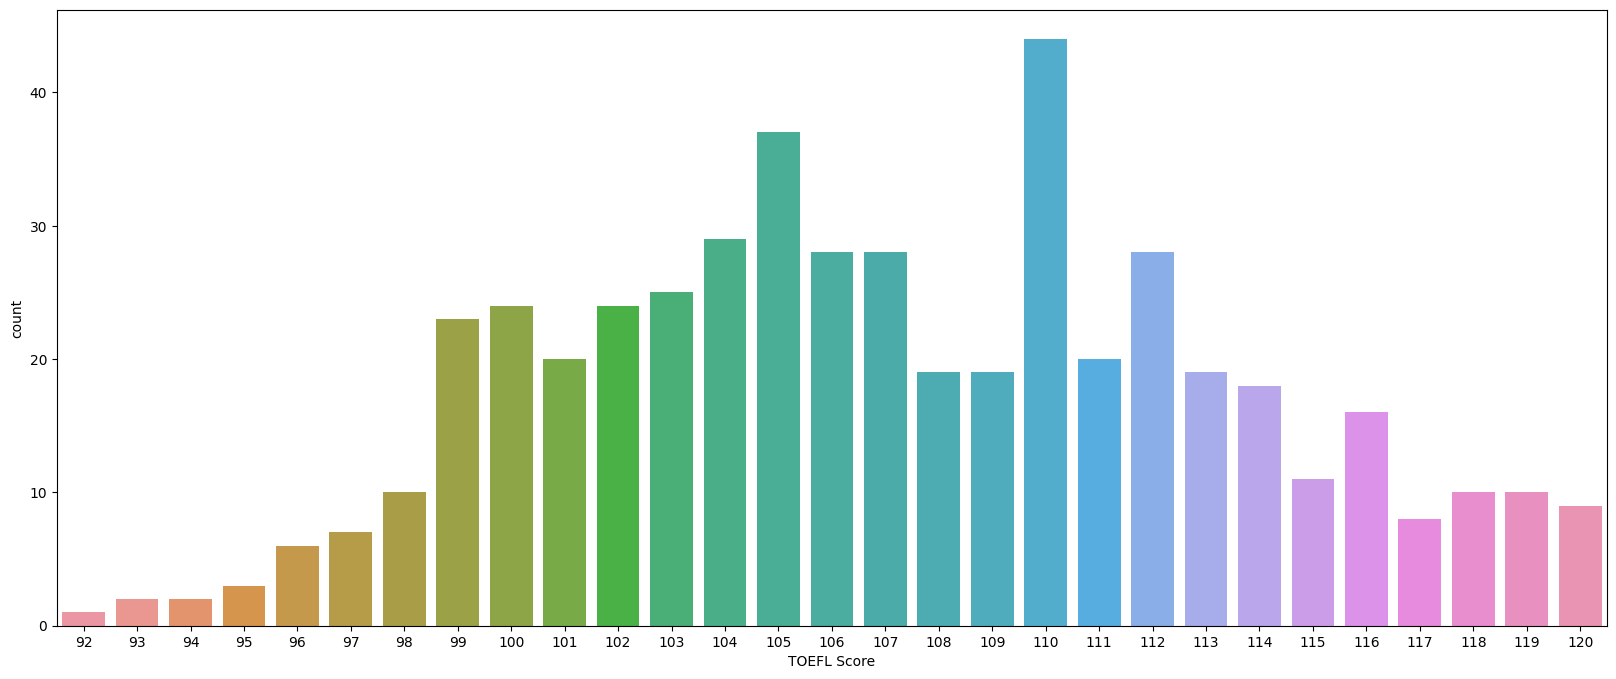

In [ ]:
plt.figure(figsize = (20,8))
plt.xlim([0,340])
sns.countplot(data=data, x= "TOEFL Score")

* TOEFL Scores are greater than 91, More No of Data points are in that range 99~112

<Axes: xlabel='University Rating', ylabel='count'>

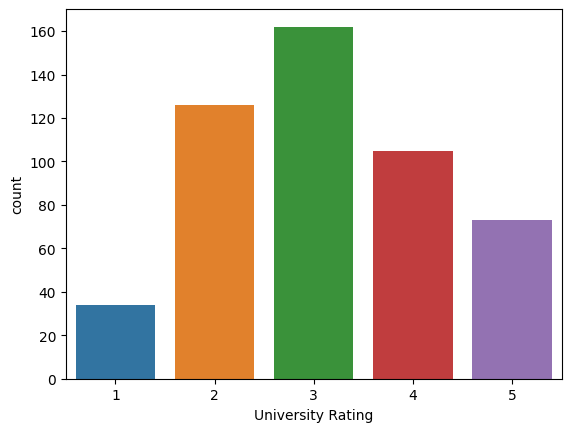

In [ ]:
sns.countplot(data=data, x= 'University Rating')

* More no of Student applied for University Ranking = 3

<Axes: xlabel='LOR', ylabel='count'>

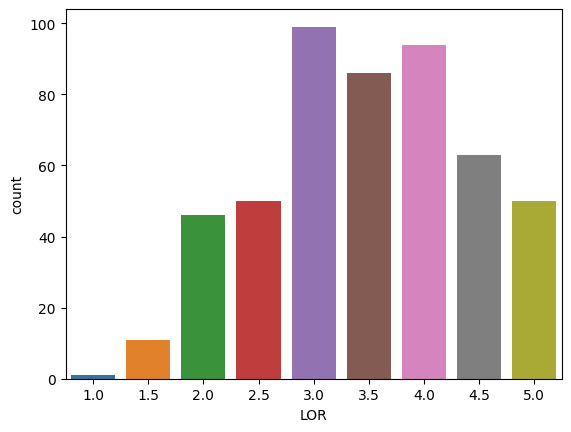

In [ ]:
sns.countplot(data=data, x= 'LOR')

* LOR ranged from 1 ~ 5
* Maximum rating lies between 3 ~ 4.5

<Axes: xlabel='SOP', ylabel='count'>

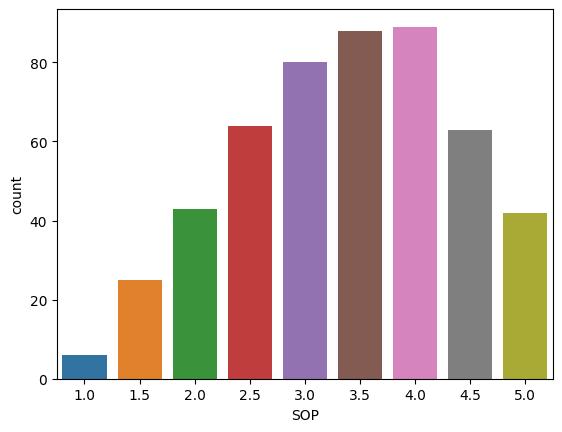

In [ ]:
sns.countplot(data=data, x= 'SOP')

* SOP ranged from 1 ~ 5
* Maximum rating lies between 2.5 ~ 4.5

<Axes: xlabel='CGPA', ylabel='Count'>

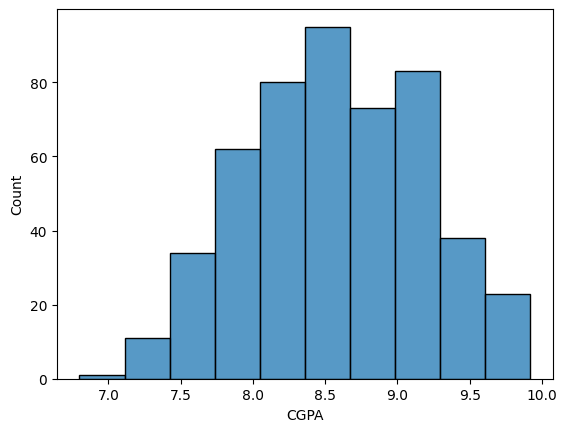

In [11]:
sns.histplot(data=data, x= 'CGPA', bins=10)

* CGPA of the Student are >= 7.0
* Maximum range lies between 7.5 ~ 9.5

<Axes: xlabel='Chance of Admit', ylabel='Count'>

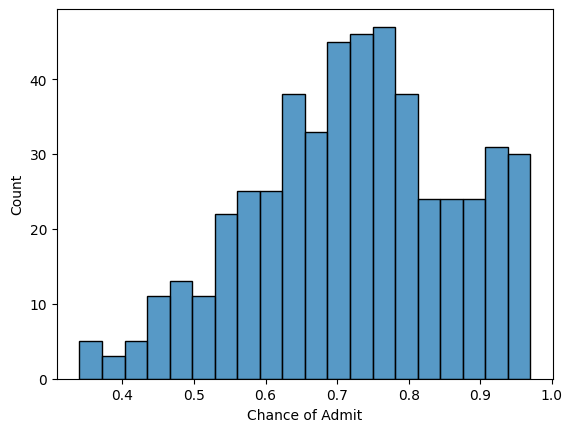

In [70]:
sns.histplot(data=data, x= 'Chance of Admit', bins=20)

## Bivariate Analysis

<Axes: xlabel='University Rating', ylabel='Chance of Admit'>

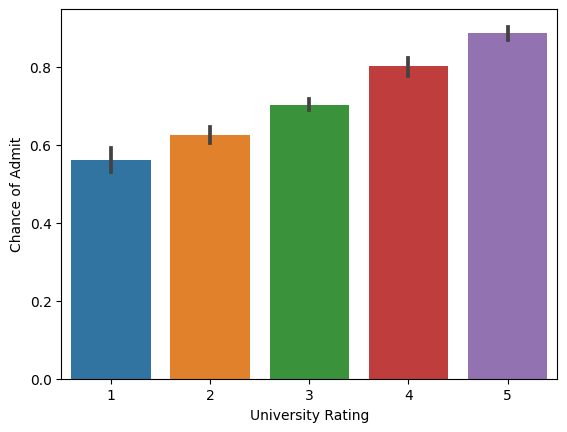

In [16]:
sns.barplot(data=data, x='University Rating',y='Chance of Admit',estimator = "mean")

<Axes: xlabel='SOP', ylabel='Chance of Admit'>

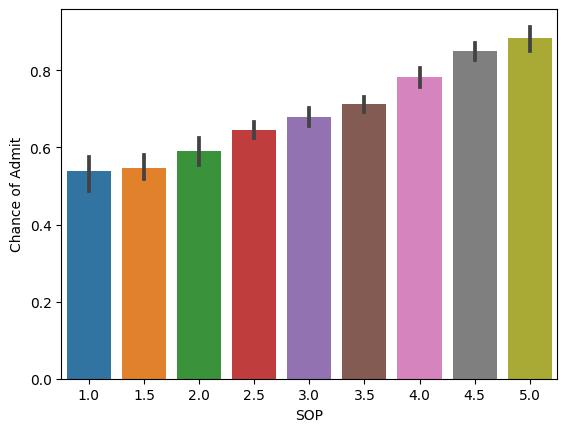

In [17]:
sns.barplot(data=data, x='SOP',y='Chance of Admit',estimator = "mean")

<Axes: xlabel='LOR', ylabel='Chance of Admit'>

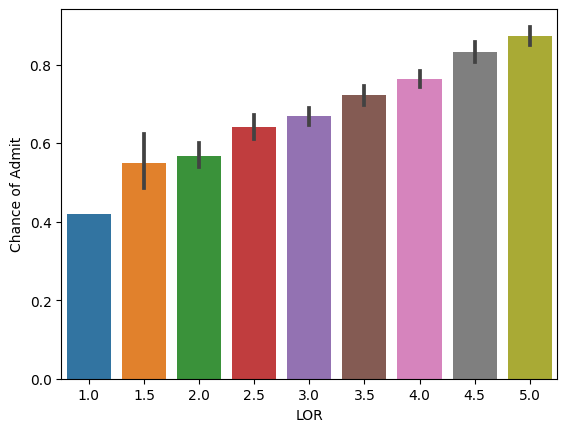

In [18]:
sns.barplot(data=data, x='LOR',y='Chance of Admit',estimator = "mean")

<Axes: xlabel='CGPA', ylabel='Chance of Admit'>

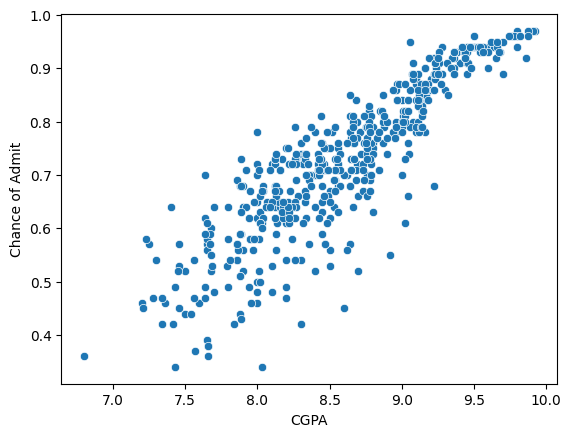

In [20]:
sns.scatterplot(data=data, x='CGPA',y='Chance of Admit')

<Axes: xlabel='GRE Score', ylabel='Chance of Admit'>

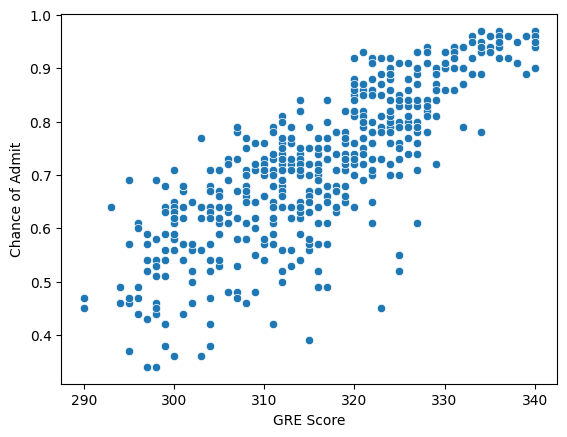

In [28]:
sns.scatterplot(data=data, x='GRE Score',y='Chance of Admit')

<Axes: xlabel='TOEFL Score', ylabel='Chance of Admit'>

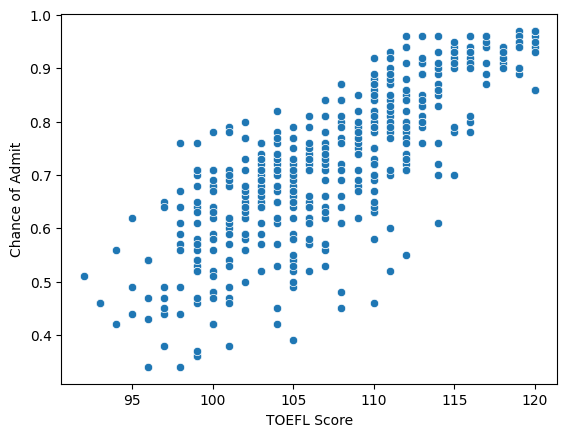

In [30]:
sns.scatterplot(data=data, x='TOEFL Score',y='Chance of Admit')

<Axes: xlabel='Research', ylabel='Chance of Admit'>

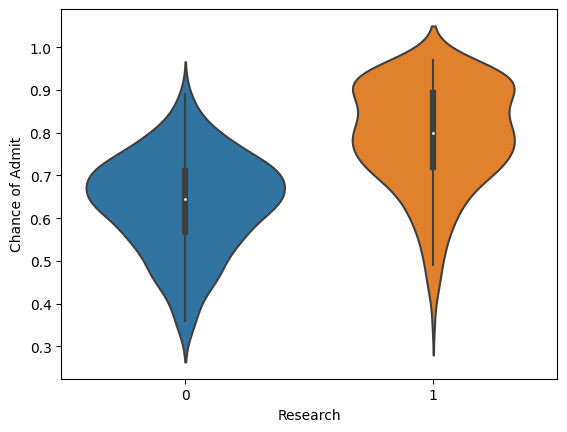

In [32]:
sns.violinplot(data = data, y = "Chance of Admit", x = "Research")

In [26]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

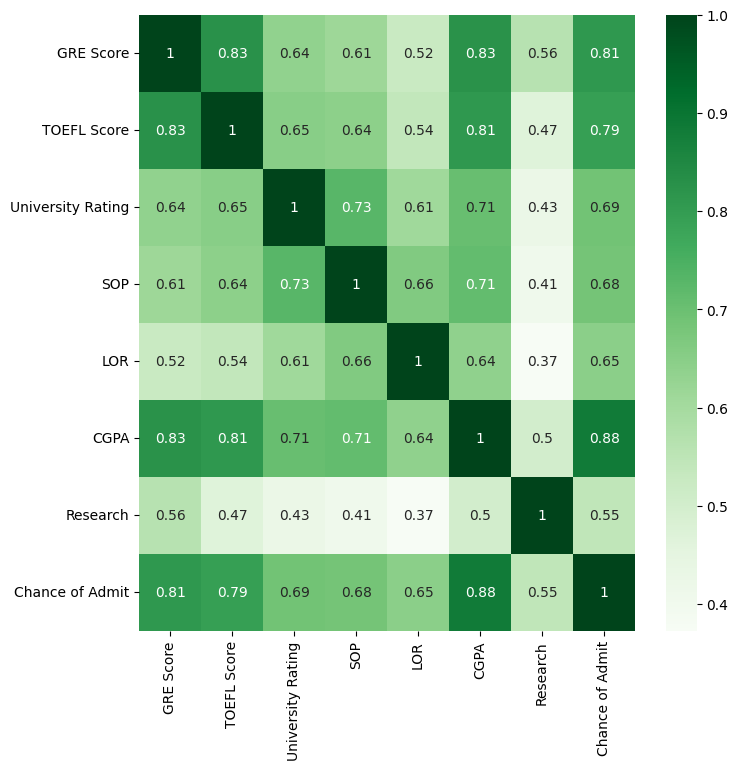

In [36]:
plt.figure(figsize =(8,8))
sns.heatmap(data.corr(),annot=True,cmap = "Greens")
plt.show()

* All features have Positive correlation with "Chance of Admit"
* CGPA[0.88],GRE Score[0.81],TOEFL Score[0.79] has very high correlation with "Chance of Admit"
* Further SOP[0.68], LOR[0.65] has almost same Correlation with ""Chance of Admit" however less than above 3"
* Least Correlation is found w.r.t Reasearch & "Chance of Admit"[0.55]

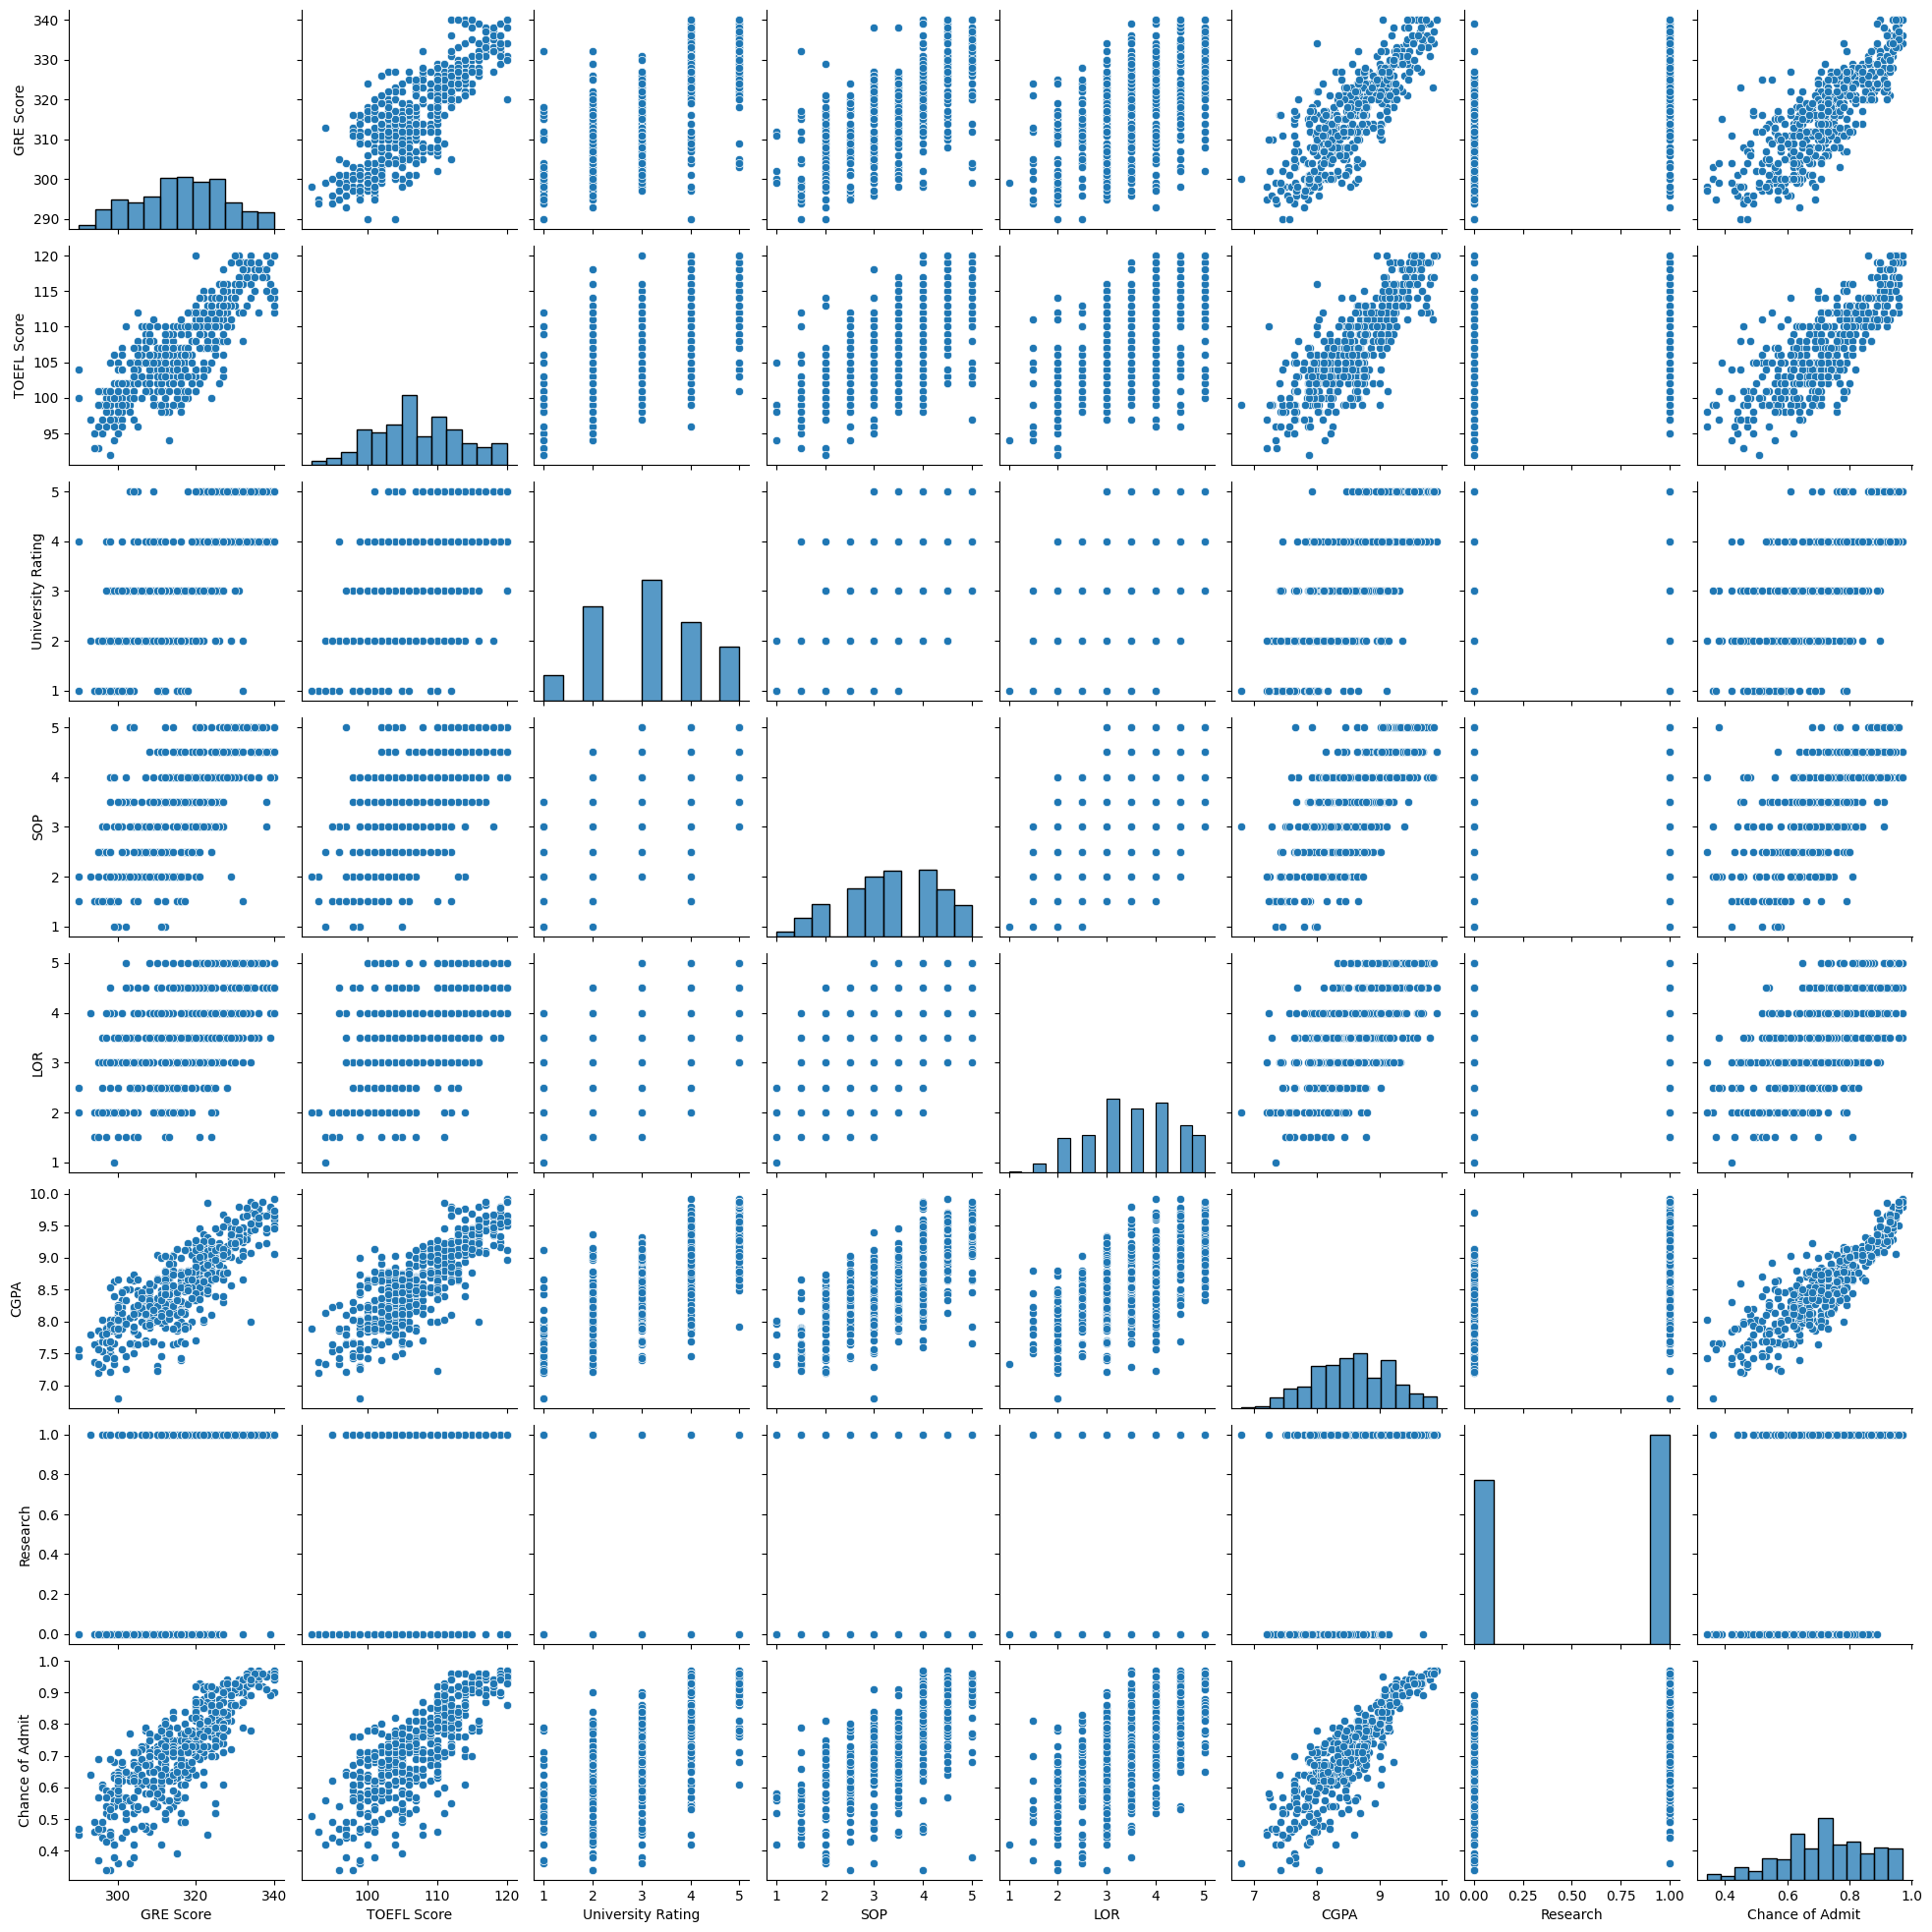

In [39]:
sns.pairplot(data=data)

* All Time & Distance Feature are very highly correlated

# **Finding & Treating Outliers Using IQR**

## IQR Analysis and Outlier Finding

In [48]:
data["CGPA"].quantile(0.25)

8.127500000000001

* We will create a new Dataframe " outlier" which store Boolean value of IQR Analysis Result for each reading of all numerical feature columns

In [46]:
# Finding outlier for all Numerical features
outlier = pd.DataFrame() # creating as new dataframe to store outliers for each numerical feature
for z in data.columns:
    print(z,"Feature")
    print("*******************************************************************")
    IQR = np.percentile(data[z],75) - np.percentile(data[z],25)
    lower_limit = max (np.percentile(data[z],25) - 1.5*IQR,0)
    upper_limit = np.percentile(data[z],75) + 1.5*IQR
    outlier[z] = (data[z]>upper_limit) | (data[z]<lower_limit)

    print("Minimum -->",data[z].min())
    print("Lower Limit -->",lower_limit)
    print("Quantile25 -->",np.percentile(data[z],25))
    print("Median -->",np.percentile(data[z],50))
    print("Quantile75 -->",np.percentile(data[z],75))
    print("Upper Limit -->",upper_limit)
    print("Maximum -->",data[z].max())

    print()
    print("Out of ",len(data[z]), "Data points , There are",outlier[z].sum(),"Outliers")
    print("Percentage of Outliers:",np.round((outlier[z].sum()/len(data[z])*100),2),"%")
    print()
    print("*******************************************************************")

GRE Score Feature
*******************************************************************
Minimum --> 290
Lower Limit --> 282.5
Quantile25 --> 308.0
Median --> 317.0
Quantile75 --> 325.0
Upper Limit --> 350.5
Maximum --> 340

Out of  500 Data points , There are 0 Outliers
Percentage of Outliers: 0.0 %

*******************************************************************
TOEFL Score Feature
*******************************************************************
Minimum --> 92
Lower Limit --> 89.5
Quantile25 --> 103.0
Median --> 107.0
Quantile75 --> 112.0
Upper Limit --> 125.5
Maximum --> 120

Out of  500 Data points , There are 0 Outliers
Percentage of Outliers: 0.0 %

*******************************************************************
University Rating Feature
*******************************************************************
Minimum --> 1
Lower Limit --> 0
Quantile25 --> 2.0
Median --> 3.0
Quantile75 --> 4.0
Upper Limit --> 7.0
Maximum --> 5

Out of  500 Data points , There are 0 Outliers
Per

In [61]:
# Finding outlier for all Numerical features
# In this we are not creating a exlusive DataFrame to Store , just find & print the index of Outliers
for z in data.columns:
    outlierlist=[]
    print(z,"Feature")
    print("*******************************************************************")
    IQR = np.percentile(data[z],75) - np.percentile(data[z],25)
    lower_limit = max (np.percentile(data[z],25) - 1.5*IQR,0)
    upper_limit = np.percentile(data[z],75) + 1.5*IQR
    outlierlist.extend(list(np.where( (data[z]>upper_limit) | (data[z]<lower_limit) )[0]))

    print("Minimum -->",data[z].min())
    print("Lower Limit -->",lower_limit)
    print("Quantile25 -->",np.percentile(data[z],25))
    print("Median -->",np.percentile(data[z],50))
    print("Quantile75 -->",np.percentile(data[z],75))
    print("Upper Limit -->",upper_limit)
    print("Maximum -->",data[z].max())

    print("Outlier row Index:",outlierlist)

    print()
    print("Out of ",len(data[z]), "Data points , There are",len(outlierlist),"Outliers")
    print("Percentage of Outliers:",np.round((len(outlierlist)/len(data[z])*100),2),"%")
    print()
    print("*******************************************************************")

GRE Score Feature
*******************************************************************
Minimum --> 290
Lower Limit --> 282.5
Quantile25 --> 308.0
Median --> 317.0
Quantile75 --> 325.0
Upper Limit --> 350.5
Maximum --> 340
Outlier row Index: []

Out of  500 Data points , There are 0 Outliers
Percentage of Outliers: 0.0 %

*******************************************************************
TOEFL Score Feature
*******************************************************************
Minimum --> 92
Lower Limit --> 89.5
Quantile25 --> 103.0
Median --> 107.0
Quantile75 --> 112.0
Upper Limit --> 125.5
Maximum --> 120
Outlier row Index: []

Out of  500 Data points , There are 0 Outliers
Percentage of Outliers: 0.0 %

*******************************************************************
University Rating Feature
*******************************************************************
Minimum --> 1
Lower Limit --> 0
Quantile25 --> 2.0
Median --> 3.0
Quantile75 --> 4.0
Upper Limit --> 7.0
Maximum --> 5
Outlier

## Box-Plot for Outlier Visualization

* Let us visualize the outliers with Box plot

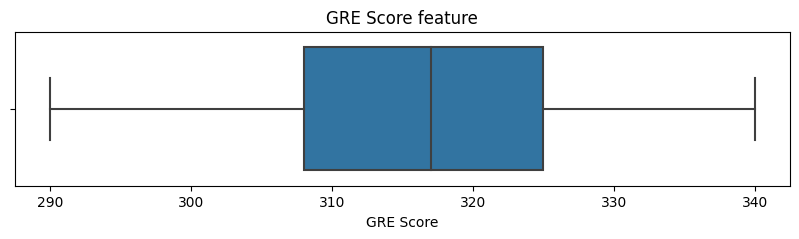

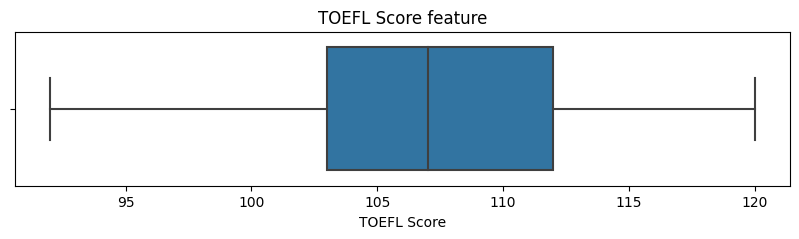

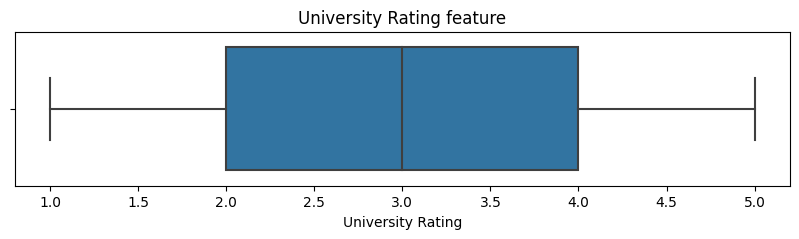

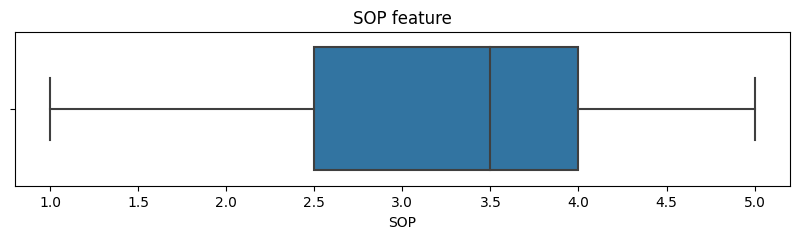

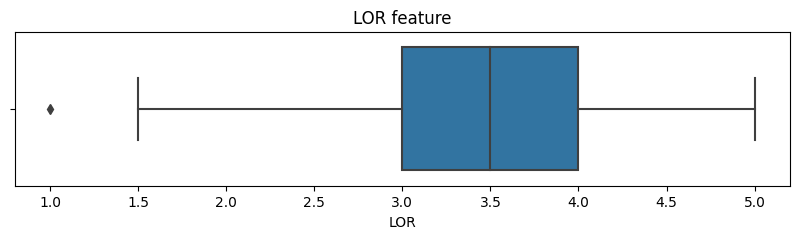

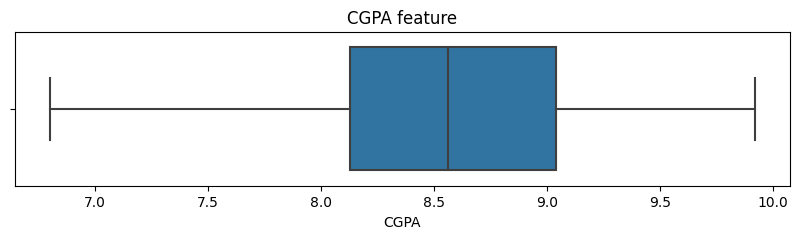

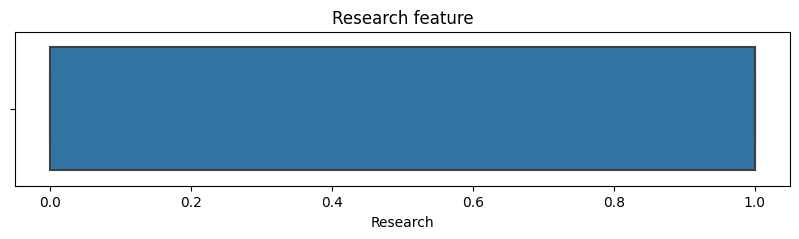

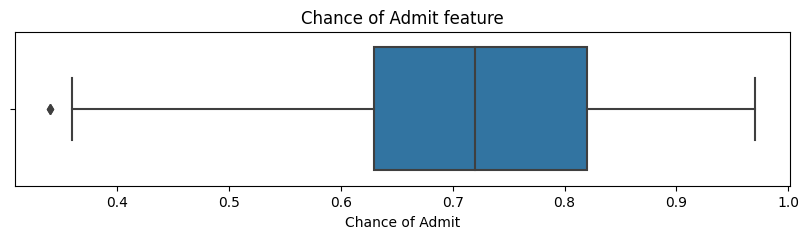

In [43]:
for z in data.columns:
  plt.figure(figsize=(10,2))
  sns.boxplot(data= data, x = z)
  plt.title(z+" feature")

## Outlier Treatment

* Lets check which Data Points are coming as Outlier, then we can decide if they have to be treated

In [63]:
outlier.shape

(500, 8)

In [ ]:
data[outlier.any(axis=1)]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
92,298,98,2,4.0,3.0,8.03,0,0.34
347,299,94,1,1.0,1.0,7.34,0,0.42
376,297,96,2,2.5,2.0,7.43,0,0.34


* **We have 2 Outliers in "Chance of Admit" --> But as it is out Target Feature, We should not Treat it**
* But there is 1 Outlier in "LOR", we will check if it has to be treated

In [82]:
data[["LOR"]].describe()

,LOR
count,500.000000
mean,3.485000
std,0.923027
min,1.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


In [69]:
data[data["LOR"] == 1]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
347,299,94,1,1.0,1.0,7.34,0,0.42


* LOR ranking is out of 5, our Outlier value is 1
* LOR values as "1" is possible values, it cannot be considered as outlier
* But as we creating only Linear Regression model Futher , we will treat this outlier and Floor the value

In [78]:
data.loc[347,"LOR"] = 1.5

<Axes: xlabel='LOR'>

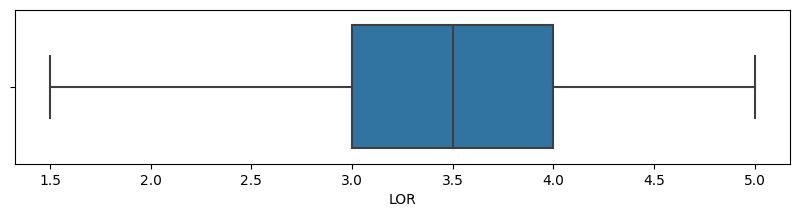

In [80]:
plt.figure(figsize=(10,2))
sns.boxplot(data=data, x= "LOR")

* 1 Outlier in LOR has been Treated, NO Oultier is visible in Box Plot

# **Hypothesis Testing**

* In this Data Differet test [Num-Num,Cat-Num,Cat-Cat] can be done
* But our objective to increase the end user experince by correctly predicting Duration of Delivery & for optimizing Logistics by correctly predicting distance w.r.t OSRM Distance & Duration
* Also we have to optimize Each Segment wise for each trip
* so we will do Hypothesis testing for below combinations
** od_total_time and start_scan_to_end_scan
** actual_time and osrm_time
** actual_time and segment_actual_time
** osrm_distance and segment_osrm_distance
** osrm_time and segment_osrm_time
** actual_distance_to_destination and osrm_distance





## Hypothesis Testing Set up

In this section let us fix the Confidence level & Level of Signification for all our Hypothesis testing.

As this is with respect to predicting demand Situation
* let us Assume **we want 95% Confidence to reject Null Hypothesi**s
* so for every Hypothesis testing, **Level of Significane will be "0.05 "**

As we have 2 Nos of Cat-Num, we will use 2 Sample T-Test or its equivalent
* Ho --> Both Categories have same Mean
* Ha --> Both Categories have different mean

Before using T-test , we will c**heck for assumptions if both Data sample means are following Normal Distribution? & does they have equal variance**?

* For **Sample means should follow Normal Distribution**, we will use Shapiro test with below Hypothesis Condition
** H0 : Data is Gaussian
** Ha : Data is not Gaussian

* For **Equal Variances** Check, we will use Levene Test with below Hypothesis condition
** H0: Variances are equal
** Ha: Variances are not equal




## od_total_time and start_scan_to_end_scan

In [ ]:
subset = ["od_total_time","start_scan_to_end_scan"]

In [ ]:
subsetsamplemean = [[np.mean(data2[i].sample(500)) for k in range(5000)] for i in subset]

* let's check for Normal Distribution of both Data sets Sample Mean

In [ ]:
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
for i in range(2):
  test_stat, p_value = shapiro(subsetsamplemean[i])
  print(p_value)
  if p_value < 0.05:
       print("Reject H0")
       print(subset[i],"Data is Not Gaussian")
  else:
       print("Fail to reject H0")
       print(subset[i],"Data is Gaussian")
  print()

1.3234453945187852e-05
Reject H0
od_total_time Data is Not Gaussian

0.006467732600867748
Reject H0
start_scan_to_end_scan Data is Not Gaussian



* Let us plot Histplot to check how data actually looks

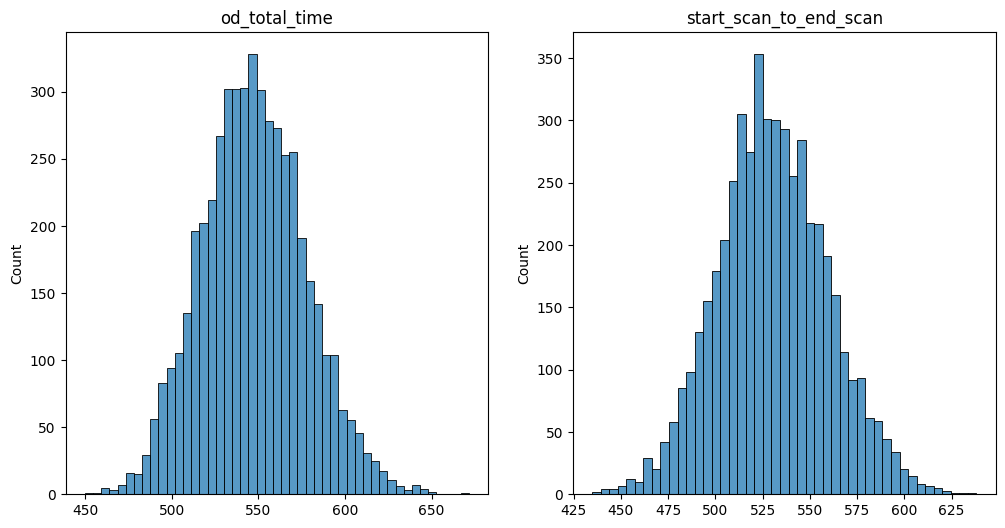

In [ ]:
plt.figure(figsize = (12,6))
for i in range(2):
  plt.subplot(1,2,i+1)
  sns.histplot(subsetsamplemean[i])
  plt.title(subset[i])
plt.show()

* Even the Histogram shows that they are not following Normal Distribution
* Let's do QQ Plot also

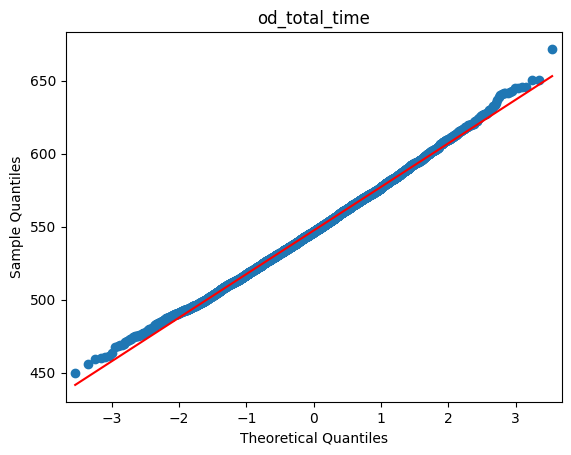

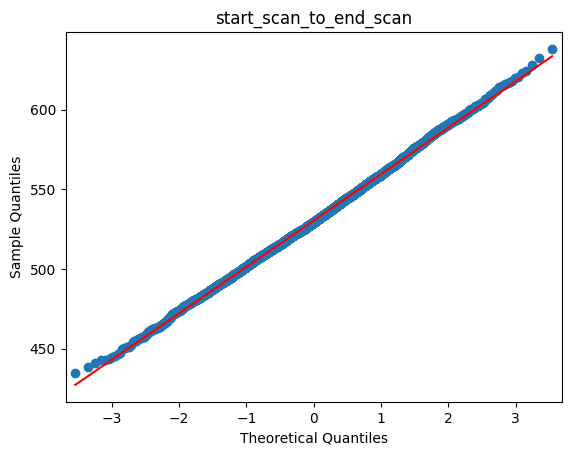

In [ ]:
for i in range(2):
   qqplot( np.array(subsetsamplemean[i]) , line="s")
   plt.title(subset[i])
   plt.show()

* From Shapiro, Histogram & QQ plot--> we can conclude that both data sets sample means are not following Normal Distribution, slightly deviated
* Now we will do Levene test to check for equal Variances of datasets

In [ ]:
# Ho: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(data2[subset[0]],data2[subset[1]])
print(p_value)
if p_value < 0.05:
    print("Reject Ho")
    print("Variances are not equal")
else:
    print("Fail to reject Ho")
    print("Variances are equal")

0.04528721781238512
Reject Ho
Variances are not equal


* Both Datasets do not have equal Variance
* T-Test Independent is valid on the assumptions that 1. Sample means of 2 data sets follow Normal Distribution & Datasets Have Equal Variances
* But both of them are not valid
* so we will **Non-Paramteric Independent sample T-test**

In [ ]:
# subset = ["od_total_time","start_scan_to_end_scan"]

#H0: mu1 <= mu2
#Ha : mu1 > mu2

kruskal_stat, p_value= mannwhitneyu(data2[subset[0]],data2[subset[1]],alternative = "greater")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

0.010834055922721585
Reject H0
One or more groups have different mean


* From Hypothesis Testing we can conclude that, **"od_total_time" is greater than "start_scan_to_end_scan" for a given trip_uuid**

# **Feature Engineering**

### Eliminate Reduntant features

* No Reduntant Feature available,
* From Hypothesis Testing we can say all feature are useful Predictor of "Chance of Admit"

## Encoding : Non-Numerical to Numerical

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


* All data points are numerical only
* So need for conversion to Numerical

## Scaling of Numerical Categories

* Before scaling let us note down Maximum and Minimum values possible for given feature( not maximum and Minimum of Features in data given)
* Further we will use the these Maximum & Minimum values for Scaling

In [83]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

* GRE Score : 260 ~ 340
* TOEFL Score : 0 ~ 120
* University Rating : 1 ~ 5
* SOP : 1 ~ 5
* LOR : 1 ~ 5
* CGPA : 0 ~ 10
* Chance of Admit : 0 ~ 10

* if we use MinmaxScaler --> It will take Minimum & maximum values of Data points in the feature only, then if we want to check our model for any new data point out the given data set, it might not give good result
* for E.g. if MinmaxScaler used on GRE Score : [290 ~ 340] will become [0 ~ 1], but if new Data point has GRE Score as 280 --> It will be considered as -0.2 which is not between [0,1]
* So we will Scale the score using Feature wise possible Maximum and Minimum values

### Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
standardized = scaler.fit_transform(data2)

In [ ]:
standardized

array([[ 2.14625072,  0.75265239,  0.92618362, ...,  1.46387707,
        -1.22781549,  1.22781549],
       [-0.38146143, -0.24588095, -0.29061509, ..., -0.20542008,
         0.81445462, -0.81445462],
       [ 5.32593091,  5.1735464 ,  0.79201088, ...,  0.78807576,
        -1.22781549,  1.22781549],
       ...,
       [-0.13385608, -0.39274303, -0.03958484, ...,  0.7209205 ,
         0.81445462, -0.81445462],
       [-0.16592008, -0.18628031, -0.45690199, ..., -0.42665845,
         0.81445462, -0.81445462],
       [-0.14632542, -0.13928955, -0.43218183, ..., -0.3540543 ,
        -1.22781549,  1.22781549]])

lets convert standardized data into our initial DataFrame Format

In [ ]:
datafinal = pd.DataFrame(standardized,columns = data2.columns)

In [ ]:
datafinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trip_uuid                       14817 non-null  float64
 1   route_schedule_uuid             14817 non-null  float64
 2   source_center                   14817 non-null  float64
 3   destination_center              14817 non-null  float64
 4   start_scan_to_end_scan          14817 non-null  float64
 5   actual_distance_to_destination  14817 non-null  float64
 6   actual_time                     14817 non-null  float64
 7   osrm_time                       14817 non-null  float64
 8   osrm_distance                   14817 non-null  float64
 9   segment_actual_time             14817 non-null  float64
 10  segment_osrm_time               14817 non-null  float64
 11  segment_osrm_distance           14817 non-null  float64
 12  od_total_time                   

### Normalization with Feature wise Max and Min Possible values

In [139]:
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
for i in data.columns:
  test_stat, p_value = shapiro(data[i])
  print(p_value)
  if p_value < 0.05:
       print("Reject H0")
       print(i,"Data is Not Gaussian")
  else:
       print("Fail to reject H0")
       print(i,"Data is Gaussian")
  print()

8.212661487050354e-05
Reject H0
GRE Score Data is Not Gaussian

8.730924309929833e-05
Reject H0
TOEFL Score Data is Not Gaussian

1.5621140431941417e-16
Reject H0
University Rating Data is Not Gaussian

9.5915581033168e-11
Reject H0
SOP Data is Not Gaussian

2.7075374928187124e-11
Reject H0
LOR Data is Not Gaussian

0.010292120277881622
Reject H0
CGPA Data is Not Gaussian

2.374212708434901e-31
Reject H0
Research Data is Not Gaussian

2.654237050592201e-06
Reject H0
Chance of Admit Data is Not Gaussian



* we have observed that All the Numericals are not following Normal Distribution, so we cannot do Stardadization
* Now we will do Normalization using transform() on each series



In [148]:
scaleddata = data.copy()

In [150]:
scaleddata["GRE Score"] = scaleddata["GRE Score"].transform(lambda x : (x-260)/(340-260))
scaleddata["TOEFL Score"] = scaleddata["TOEFL Score"].transform(lambda x : (x-0)/(120-0))
scaleddata["University Rating"] = scaleddata["University Rating"].transform(lambda x : (x-0)/(5-0))
scaleddata["SOP"] = scaleddata["SOP"].transform(lambda x : (x-0)/(5-0))
scaleddata["LOR"] = scaleddata["LOR"].transform(lambda x : (x-0)/(5-0))
scaleddata["CGPA"] = scaleddata["CGPA"].transform(lambda x : (x-0)/(10-0))

In [152]:
scaleddata

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.9625,0.983333,0.8,0.9,0.9,0.965,1,0.92
1,0.8000,0.891667,0.8,0.8,0.9,0.887,1,0.76
2,0.7000,0.866667,0.6,0.6,0.7,0.800,1,0.72
3,0.7750,0.916667,0.6,0.7,0.5,0.867,1,0.80
4,0.6750,0.858333,0.4,0.4,0.6,0.821,0,0.65
...,...,...,...,...,...,...,...,...
495,0.9000,0.900000,1.0,0.9,0.8,0.902,1,0.87
496,0.9625,0.975000,1.0,1.0,1.0,0.987,1,0.96
497,0.8750,1.000000,1.0,0.9,1.0,0.956,1,0.93
498,0.6500,0.858333,0.8,0.8,1.0,0.843,0,0.73


In [153]:
scaleddata.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,0.705900,0.893267,0.622800,0.674800,0.69680,0.857644,0.560000,0.72174
std,0.141189,0.050682,0.228702,0.198201,0.18509,0.060481,0.496884,0.14114
min,0.375000,0.766667,0.200000,0.200000,0.20000,0.680000,0.000000,0.34000
25%,0.600000,0.858333,0.400000,0.500000,0.60000,0.812750,0.000000,0.63000
50%,0.712500,0.891667,0.600000,0.700000,0.70000,0.856000,1.000000,0.72000
75%,0.812500,0.933333,0.800000,0.800000,0.80000,0.904000,1.000000,0.82000
max,1.000000,1.000000,1.000000,1.000000,1.00000,0.992000,1.000000,0.97000


### Normalization using MinmaxScaler

In [154]:
Normscaler = MinMaxScaler()

In [155]:
scaleddata2 = Normscaler.fit_transform(data)

In [156]:
scaleddata2

array([[0.94      , 0.92857143, 0.75      , ..., 0.91346154, 1.        ,
        0.92063492],
       [0.68      , 0.53571429, 0.75      , ..., 0.66346154, 1.        ,
        0.66666667],
       [0.52      , 0.42857143, 0.5       , ..., 0.38461538, 1.        ,
        0.6031746 ],
       ...,
       [0.8       , 1.        , 1.        , ..., 0.88461538, 1.        ,
        0.93650794],
       [0.44      , 0.39285714, 0.75      , ..., 0.5224359 , 0.        ,
        0.61904762],
       [0.74      , 0.75      , 0.75      , ..., 0.71794872, 0.        ,
        0.79365079]])

In [157]:
scaleddata2 = pd.DataFrame(scaleddata,columns = data.columns)

In [158]:
scaleddata2

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.9625,0.983333,0.8,0.9,0.9,0.965,1,0.92
1,0.8000,0.891667,0.8,0.8,0.9,0.887,1,0.76
2,0.7000,0.866667,0.6,0.6,0.7,0.800,1,0.72
3,0.7750,0.916667,0.6,0.7,0.5,0.867,1,0.80
4,0.6750,0.858333,0.4,0.4,0.6,0.821,0,0.65
...,...,...,...,...,...,...,...,...
495,0.9000,0.900000,1.0,0.9,0.8,0.902,1,0.87
496,0.9625,0.975000,1.0,1.0,1.0,0.987,1,0.96
497,0.8750,1.000000,1.0,0.9,1.0,0.956,1,0.93
498,0.6500,0.858333,0.8,0.8,1.0,0.843,0,0.73


In [123]:
scaleddata2.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.529440,0.542571,0.528500,0.593500,0.621000,0.569372,0.560000,0.605937
std,0.225903,0.217210,0.285878,0.247751,0.231362,0.193850,0.496884,0.224032
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.360000,0.392857,0.250000,0.375000,0.500000,0.425481,0.000000,0.460317
50%,0.540000,0.535714,0.500000,0.625000,0.625000,0.564103,1.000000,0.603175
75%,0.700000,0.714286,0.750000,0.750000,0.750000,0.717949,1.000000,0.761905
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [160]:
scaleddata.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,0.705900,0.893267,0.622800,0.674800,0.69680,0.857644,0.560000,0.72174
std,0.141189,0.050682,0.228702,0.198201,0.18509,0.060481,0.496884,0.14114
min,0.375000,0.766667,0.200000,0.200000,0.20000,0.680000,0.000000,0.34000
25%,0.600000,0.858333,0.400000,0.500000,0.60000,0.812750,0.000000,0.63000
50%,0.712500,0.891667,0.600000,0.700000,0.70000,0.856000,1.000000,0.72000
75%,0.812500,0.933333,0.800000,0.800000,0.80000,0.904000,1.000000,0.82000
max,1.000000,1.000000,1.000000,1.000000,1.00000,0.992000,1.000000,0.97000


## Final data - Dividing Data for Training & Test

* Our desired Outcome is "Chance of Admit"
* So we will divide our scaleddata into X,y
* we will use 80:20 ratio for train & test
* Further we will Divide X & y as below data sets
** Xtrain
** Xtest
** ytrain
** ytest

In [192]:
X = scaleddata.drop(["Chance of Admit"], axis = 1)
y = scaleddata["Chance of Admit"]

In [193]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2)

In [194]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((400, 7), (100, 7), (400,), (100,))

# **Model Training - Linear Regression**

In [195]:
Xtrain1 = sm.add_constant(Xtrain)  # Statmodels default is without intercept, to add intercept we need to add constant.

model = sm.OLS(ytrain, Xtrain1)
results = model.fit()

In [196]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     272.1
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          3.33e-146
Time:                        10:21:40   Log-Likelihood:                 573.41
No. Observations:                 400   AIC:                            -1131.
Df Residuals:                     392   BIC:                            -1099.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.7869      0.08

In [197]:
# Calculating the Predicted Values (yhat) of training data
yhattrain = results.predict(Xtrain1)

In [198]:
# Calculating the Predicted Values (yhat) of testing data
Xtest1 = sm.add_constant(Xtest)
yhattest = results.predict(Xtest1)

In [212]:
results.params

const               -0.786890
GRE Score            0.170729
TOEFL Score          0.354095
University Rating    0.024212
SOP                  0.010478
LOR                  0.093001
CGPA                 1.133616
Research             0.024713
dtype: float64

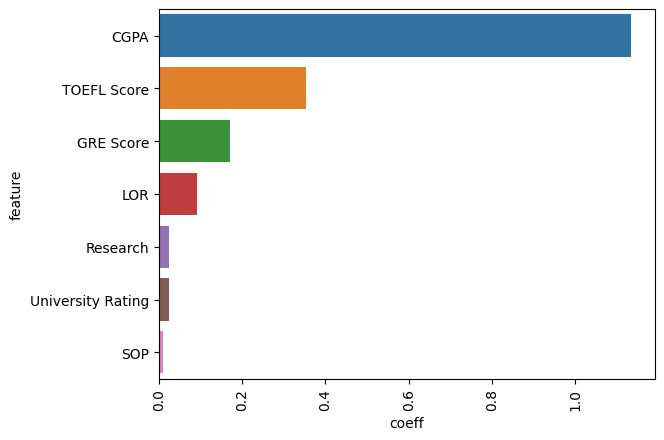

In [222]:
imp = pd.DataFrame(list(zip(Xtest.columns,np.abs(results.params[1:]))),
                   columns=['feature', 'coeff'])
imp.sort_values(by = "coeff", ascending = False, inplace = True)
sns.barplot(y='feature', x='coeff', data=imp)
plt.xticks(rotation=90)
plt.show()

* CGPA is the most important Feature for predicting "Chance of Admit"
* Next comes TOEFL Score, GRE Score, LOR
* Research, University Rating & SOP has least effect for Predicting "Chance of Admit"

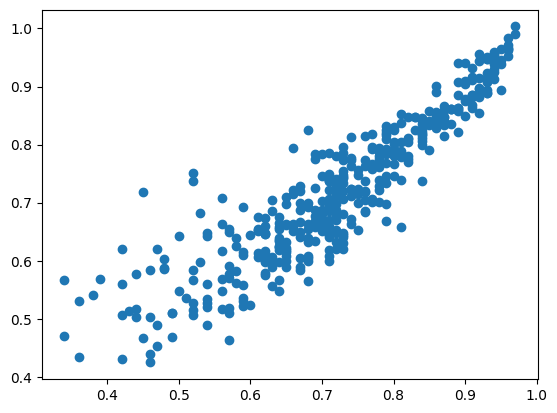

In [223]:
plt.scatter(ytrain, yhattrain)

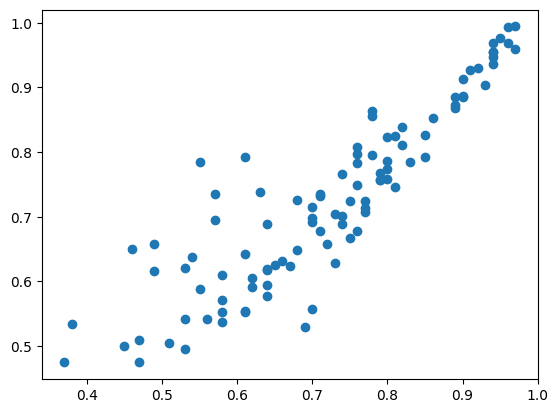

In [224]:
plt.scatter(ytest, yhattest)

* lets check R-square of Testing & Training data

## R-Square

In [201]:
# R-square for training data
1 - np.sum((ytrain - yhattrain)**2)/np.sum((ytrain - ytrain.mean())**2)

0.8293227233691719

In [200]:
# R-square for testing data
1 - np.sum((ytest - yhattest)**2)/np.sum((ytest - ytest.mean())**2)

0.7927524897595933

* From R-square Values of Test & Train Data, we can say model is neither Overfit nor Underfit
* It is appropriately Fit

## R-Square Adjusted

In [204]:
# R-square adjusted for training data
R2= 1 - np.sum((ytrain - yhattrain)**2)/np.sum((ytrain - ytrain.mean())**2)
1 - (1-R2) * ((Xtrain.shape[0]-1)/(Xtrain.shape[0]-Xtrain.shape[1]-1))

0.8262749148579072

In [203]:
# R-square adjusted for testing data
R2= 1 - np.sum((ytest - yhattest)**2)/np.sum((ytest - ytest.mean())**2)
1 - (1-R2) * ((Xtest.shape[0]-1)/(Xtest.shape[0]-Xtest.shape[1]-1))

0.7769836574586928

* From Comparison of R-Square and R-Square Adjusted, we can say there might be some irreleavent Feature not Contributing to "Chance of Admit" Prediction

## Mean Absolute Error

In [205]:
# MAE for Training data
(np.sum(np.abs(ytrain-yhattrain)))/len(ytrain)

0.04135128561956916

In [206]:
# MAE for testing data
(np.sum(np.abs(ytest-yhattest)))/len(ytest)

0.047300574286206105

## Root Mean Square Error

In [207]:
# RMSE for Training data
((np.sum((ytrain-yhattrain)**2))**0.5)/len(ytrain)

0.0028850657001723

In [208]:
# RMSE for testing data
((np.sum((ytest-yhattest)**2))**0.5)/len(ytest)

0.006655287746564802

# **Check Assumptions of Linear Regression**

# **Bussiness Insights**

* The DataSet provided is between 2018-09-12 00:00:16.535741 & 2018-10-03 23:59:42.701692
* Training : Test Data Ratio use = 72:28
* 60% trips are of Cart Types, rest are of FTL type
* Trip creations are lowest in the Noon and Starts to increase and reaches peak in midnight
* More Number of Trip are created in the moiddle of the month and Number of trips are less at start and End of month
* There is not much effect of Week ina month for trip Creation
* Top 5 Source States:Maharastra,Karnataka,Harayana,Tamilnadu,Delhi
* Top 5 destination States: Maharastra,Karnataka,Harayana,Tamilnadu,Telangana
* Top5 Source Cities:Bengaluru,Gurgoan,Mumbai,Bhiwandi,Delhi
* Top5 Destination Cities: Bengaluru,Mumbai,Gurgoan,Hyderabad,Bhiwandi

* "od_total_time" is greater than "start_scan_to_end_scan" for a given trip_uuid
* "actual_time" is always greater than "osrm_time" for a given trip_uuid
* "actual_time" & "segment_actual_time" have approx same mean for a given trip_uuid
* "osrm_distance" is less than "segment_osrm_distance" for a given trip_uuid
* "osrm_time" is less than "segment_osrm_time" for a given trip_uuid
* "actual_distance_to_destination" is less than "osrm_distance" for a given trip_uuid

# **Recommendations**

* Major Traffic is found in Maharastra, Karnataka,Haryana --> Appropriate infrastructure & Manpower needs to be maintained to reduce logitics Delays
* Carting Type Trip from among manjor Cities (Bengaluru, Gurugaon,Mumbai,Hyderabad,Delhi,Bhiwandi) can be Converted to FTL by delhivery to further Optimize the Total trip Duration
* High Trip Creation goes on during night time, & in the middle of the month, so appropriate Resource to be maintained to reduce process bottle Necks
* Actual Trip Time is alwasy greater than Osrm predicted time, so Accordingly Buffer to be added , so that no false commitment at customer end
* Actual Distance_to_Destination is statistically lower than osrm distance, so correction might be needed for distance calculation so that price of trip can be optimised according & best value can be given to customer